<img src="Images/SpaceX.jpg" style = "width: 2800px; height: 800px; object-fit: cover; float: left; text-align: left;" alt = "image description">

# SpaceX - Satellite Failure Prediction
<hr style="border-top: 2px solid black;">

**Introduction:** SpaceX, a leading innovator in the satellite industry, provides advanced satellite-based services and technology to customers globally. With the increasing demand for satellite-based internet and communications, the company is dedicated to ensuring the reliability and longevity of their satellite fleet while minimizing operational costs. One of their most notable ventures is the Starlink program, which aims to provide high-speed internet access to remote and underserved areas around the world through a network of thousands of satellites in low Earth orbit. Starlink's goal is to offer satellite-based internet access to individuals, businesses, and organizations, who would otherwise be unable to access high-speed internet, thus closing the digital divide and connecting the world.

**Business Problem:** SpaceX, through its Starlink program, is facing a significant challenge in maintaining the integrity of their satellite fleet. The high costs associated with replacing failed satellites pose a significant financial burden to the company, and can negatively impact the availability and quality of service for customers. To address this problem, the company aims to predict which satellites are at risk of failure, in order to implement preventative measures and avoid costly replacements. By using data and machine learning techniques, we can analyze telemetry data, weather data, and other relevant information to identify patterns and trends that indicate a satellite's likelihood of failure. This will enable the company to proactively address potential issues and ensure the continuity of service for customers, while reducing costs and maintaining the overall efficiency of the satellite fleet.

**Project Overview:** This project aims to address the challenge of maintaining the integrity and reliability of SpaceX's satellite fleet through the implementation of advanced data analysis and machine learning techniques. As the lead Data Engineer and Data Scientist, my role is to design and implement a comprehensive data pipeline that ingests, processes, and analyzes various data sources such as telemetry, weather and satellite configuration data. By leveraging these insights, I will create predictive models that identify the likelihood of satellite failure based on various factors such as satellite age, orbital characteristics and environmental conditions. These predictions will enable SpaceX to adopt preventative measures and optimize their satellite fleet, resulting in increased reliability, improved efficiency and cost-effectiveness of their operations. Ultimately, this project aims to enhance the customer experience and contribute to the company's profitability.

**Data Collection:** The satellite and telemetry data used in this project was obtained from Kaggle (https://www.kaggle.com/), a platform that hosts a wide range of datasets. The weather data was sourced from the National Oceanic and Atmospheric Administration (NOAA) (https://www.noaa.gov/). The data was collected over a period of several years to ensure a large and diverse dataset for training the predictive models. It is worth noting that this data will be used solely for the purpose of personal projects aimed at increasing my machine learning technical skills and for no other purpose.

## Data Inspection

In [1]:
!ls Data

SpaceX Satellite Dataset.csv weather.csv
iot_telemetry_data.csv


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import networkx as nx
import folium
import datetime as dt
from sklearn.impute import SimpleImputer

In [3]:
df1 = pd.read_csv('Data/SpaceX Satellite Dataset.csv', index_col = 'Satellite ID(Fake)', 
                  usecols = lambda column: column not in ["Unnamed: 0"])
df2 = pd.read_csv('Data/weather.csv')
df3 = pd.read_csv('Data/iot_telemetry_data.csv')

In [4]:
# Reading the SpaceX Satellite dataset
df1.head()

,Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Users,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,...,Period (minutes),Launch Mass (kg.),Date of Launch,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number
Satellite ID(Fake),,,,,,,,,,,,,,,,,,,,,
1,Starlink-1007,USA,USA,Commercial,LEO,Non-Polar Inclined,0.0,559.0,561.0,0.000144,...,95.9,227.0,2019-11-11,NaN,SpaceX,USA,Cape Canaveral,Falcon 9,2019-074A,44713.0
2,Starlink-1008,USA,USA,Commercial,LEO,Non-Polar Inclined,0.0,549.0,551.0,0.000145,...,95.6,227.0,2019-11-11,NaN,SpaceX,USA,Cape Canaveral,Falcon 9,2019-074B,44714.0
3,Starlink-1009,USA,USA,Commercial,LEO,Non-Polar Inclined,0.0,549.0,551.0,0.000145,...,95.5,227.0,2019-11-11,NaN,SpaceX,USA,Cape Canaveral,Falcon 9,2019-074C,44715.0
4,Starlink-1010,USA,USA,Commercial,LEO,Non-Polar Inclined,0.0,533.0,535.0,0.000145,...,95.3,227.0,2019-11-11,NaN,SpaceX,USA,Cape Canaveral,Falcon 9,2019-074D,44716.0
5,Starlink-1011,USA,USA,Commercial,LEO,Non-Polar Inclined,0.0,548.0,551.0,0.000217,...,95.6,227.0,2019-11-11,NaN,SpaceX,USA,Cape Canaveral,Falcon 9,2019-074E,44717.0


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902 entries, 1 to 902
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Current Official Name of Satellite  902 non-null    object 
 1   Country/Org of UN Registry          902 non-null    object 
 2   Country of Operator/Owner           902 non-null    object 
 3   Users                               902 non-null    object 
 4   Class of Orbit                      902 non-null    object 
 5   Type of Orbit                       902 non-null    object 
 6   Longitude of GEO (degrees)          902 non-null    float64
 7   Perigee (km)                        902 non-null    float64
 8   Apogee (km)                         902 non-null    float64
 9   Eccentricity                        902 non-null    float64
 10  Inclination (degrees)               902 non-null    float64
 11  Period (minutes)                    902 non-n

In [6]:
df1.shape

(902, 21)

In [7]:
df1.isna().sum()

Current Official Name of Satellite      0
Country/Org of UN Registry              0
Country of Operator/Owner               0
Users                                   0
Class of Orbit                          0
Type of Orbit                           0
Longitude of GEO (degrees)              0
Perigee (km)                            0
Apogee (km)                             0
Eccentricity                            0
Inclination (degrees)                   0
Period (minutes)                        0
Launch Mass (kg.)                       0
Date of Launch                          0
Expected Lifetime (yrs.)              606
Contractor                              0
Country of Contractor                   0
Launch Site                             0
Launch Vehicle                          0
COSPAR Number                           0
NORAD Number                            0
dtype: int64

In [8]:
# It seems like we have 3 types of data. (Int64, Object, and Float64)
df1.dtypes

Current Official Name of Satellite     object
Country/Org of UN Registry             object
Country of Operator/Owner              object
Users                                  object
Class of Orbit                         object
Type of Orbit                          object
Longitude of GEO (degrees)            float64
Perigee (km)                          float64
Apogee (km)                           float64
Eccentricity                          float64
Inclination (degrees)                 float64
Period (minutes)                      float64
Launch Mass (kg.)                     float64
Date of Launch                         object
Expected Lifetime (yrs.)              float64
Contractor                             object
Country of Contractor                  object
Launch Site                            object
Launch Vehicle                         object
COSPAR Number                          object
NORAD Number                          float64
dtype: object

In [9]:
df1.duplicated().sum()

0

In [10]:
# Almost all of the data in our df1 are unique and note repeated... Except Expected Lifetime.
df1.apply(pd.value_counts).sum()

Current Official Name of Satellite    902.0
Country/Org of UN Registry            902.0
Country of Operator/Owner             902.0
Users                                 902.0
Class of Orbit                        902.0
Type of Orbit                         902.0
Longitude of GEO (degrees)            902.0
Perigee (km)                          902.0
Apogee (km)                           902.0
Eccentricity                          902.0
Inclination (degrees)                 902.0
Period (minutes)                      902.0
Launch Mass (kg.)                     902.0
Date of Launch                        902.0
Expected Lifetime (yrs.)              296.0
Contractor                            902.0
Country of Contractor                 902.0
Launch Site                           902.0
Launch Vehicle                        902.0
COSPAR Number                         902.0
NORAD Number                          902.0
dtype: float64

In [11]:
df1.describe()

,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Expected Lifetime (yrs.),NORAD Number
count,902.0,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,296.0,902.000000
mean,0.0,535.354767,540.590909,0.000379,53.006652,94.482040,242.036585,4.0,45838.186253
std,0.0,45.497136,46.247513,0.000341,0.024933,2.119187,16.444093,0.0,741.878875
min,0.0,301.000000,311.000000,0.000072,53.000000,89.900000,227.000000,4.0,44238.000000
25%,0.0,548.000000,551.000000,0.000145,53.000000,94.500000,227.000000,4.0,45206.250000
50%,0.0,548.000000,551.000000,0.000217,53.000000,95.600000,227.000000,4.0,45747.500000
75%,0.0,549.000000,561.000000,0.000939,53.000000,95.600000,260.000000,4.0,46541.750000
max,0.0,569.000000,571.000000,0.000939,53.100000,96.500000,260.000000,4.0,47181.000000


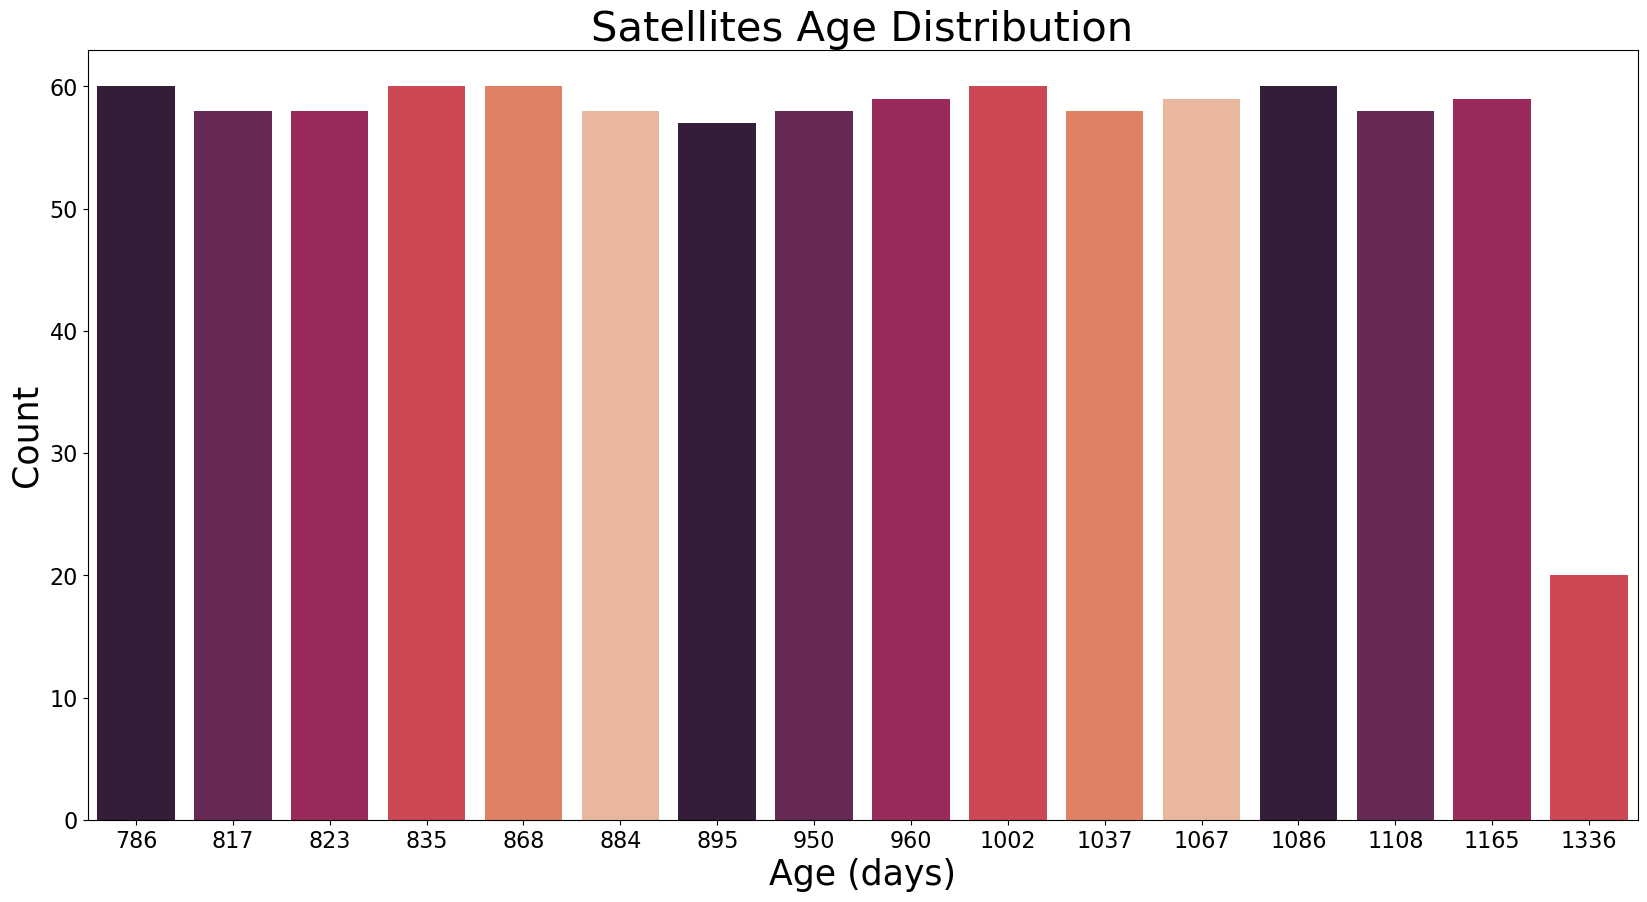

In [12]:
df1['Date of Launch'] = pd.to_datetime(df1['Date of Launch'])
now = dt.datetime.now()
df1['Age'] = (now - df1['Date of Launch']).dt.days

plt.figure(figsize=(20,10))
my_cmap = sns.color_palette("rocket")
sns.countplot(x = "Age", data = df1, color = 'blue',  palette = my_cmap)
plt.xlabel("Age (days)", fontsize = 25)
plt.ylabel("Count", fontsize = 25)
plt.title("Satellites Age Distribution", fontsize = 30)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

**NOTE:** The age of the satellites in the dataset is presented in days, with the oldest satellite having an age of 1336 days and the youngest having an age of 786 days. This indicates that the oldest satellite was launched 1336 days ago and the youngest was launched 786 days ago, relative to the current date.

In [13]:
# Inspecting weather dataset.
df2.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,PGTM,PRCP,SNOW,...,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08
0,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",47.44467,-122.31442,112.5,2020-11-01,6.71,NaN,0.00,0.0,...,20.0,16.1,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",47.44467,-122.31442,112.5,2020-11-02,5.59,NaN,0.00,0.0,...,210.0,13.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",47.44467,-122.31442,112.5,2020-11-03,6.71,NaN,0.90,0.0,...,150.0,13.0,16.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",47.44467,-122.31442,112.5,2020-11-04,15.43,NaN,0.18,0.0,...,200.0,28.0,36.9,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",47.44467,-122.31442,112.5,2020-11-05,11.41,NaN,0.32,0.0,...,200.0,23.9,30.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df2.shape

(805, 25)

In [15]:
# 3 types of data as well 
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATION    805 non-null    object 
 1   NAME       805 non-null    object 
 2   LATITUDE   805 non-null    float64
 3   LONGITUDE  805 non-null    float64
 4   ELEVATION  805 non-null    float64
 5   DATE       805 non-null    object 
 6   AWND       804 non-null    float64
 7   PGTM       1 non-null      float64
 8   PRCP       801 non-null    float64
 9   SNOW       804 non-null    float64
 10  SNWD       804 non-null    float64
 11  TAVG       791 non-null    float64
 12  TMAX       805 non-null    int64  
 13  TMIN       805 non-null    int64  
 14  WDF2       804 non-null    float64
 15  WDF5       804 non-null    float64
 16  WSF2       804 non-null    float64
 17  WSF5       804 non-null    float64
 18  WT01       442 non-null    float64
 19  WT02       58 non-null     float64
 20  WT03      

In [16]:
# We have a few columsn that has less than 20 missing data and a few has more 300 missing values
df2.isna().sum()

STATION        0
NAME           0
LATITUDE       0
LONGITUDE      0
ELEVATION      0
DATE           0
AWND           1
PGTM         804
PRCP           4
SNOW           1
SNWD           1
TAVG          14
TMAX           0
TMIN           0
WDF2           1
WDF5           1
WSF2           1
WSF5           1
WT01         363
WT02         747
WT03         788
WT04         802
WT05         803
WT06         803
WT08         710
dtype: int64

In [17]:
df2.duplicated().sum()

0

In [18]:
df2.describe()

,LATITUDE,LONGITUDE,ELEVATION,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,...,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08
count,8.050000e+02,805.00000,805.0,804.000000,1.0,801.000000,804.000000,804.000000,791.000000,805.000000,...,804.000000,804.000000,804.000000,442.0,58.0,17.0,3.0,2.0,2.0,95.0
mean,4.744467e+01,-122.31442,112.5,7.950796,406.0,0.122984,0.034701,0.054478,52.152971,59.896894,...,180.074627,16.835697,22.966045,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,1.421969e-14,0.00000,0.0,3.139925,NaN,0.277736,0.384316,0.460296,11.298958,14.027711,...,97.312553,5.417692,7.994949,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,4.744467e+01,-122.31442,112.5,1.790000,406.0,0.000000,0.000000,0.000000,20.000000,26.000000,...,10.000000,6.900000,8.900000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,4.744467e+01,-122.31442,112.5,5.820000,406.0,0.000000,0.000000,0.000000,44.000000,49.000000,...,120.000000,13.000000,17.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,4.744467e+01,-122.31442,112.5,7.380000,406.0,0.000000,0.000000,0.000000,50.000000,57.000000,...,200.000000,16.100000,21.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,4.744467e+01,-122.31442,112.5,9.620000,406.0,0.130000,0.000000,0.000000,61.000000,71.000000,...,230.000000,19.900000,27.100000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,4.744467e+01,-122.31442,112.5,21.030000,406.0,2.970000,8.900000,7.100000,91.000000,108.000000,...,360.000000,44.100000,59.100000,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [19]:
# Almost all of the data in our df2 are unique and note repeated... Except a few that has missing values.
df2.apply(pd.value_counts).sum()

STATION      805.0
NAME         805.0
LATITUDE     805.0
LONGITUDE    805.0
ELEVATION    805.0
DATE         805.0
AWND         804.0
PGTM           1.0
PRCP         801.0
SNOW         804.0
SNWD         804.0
TAVG         791.0
TMAX         805.0
TMIN         805.0
WDF2         804.0
WDF5         804.0
WSF2         804.0
WSF5         804.0
WT01         442.0
WT02          58.0
WT03          17.0
WT04           3.0
WT05           2.0
WT06           2.0
WT08          95.0
dtype: float64

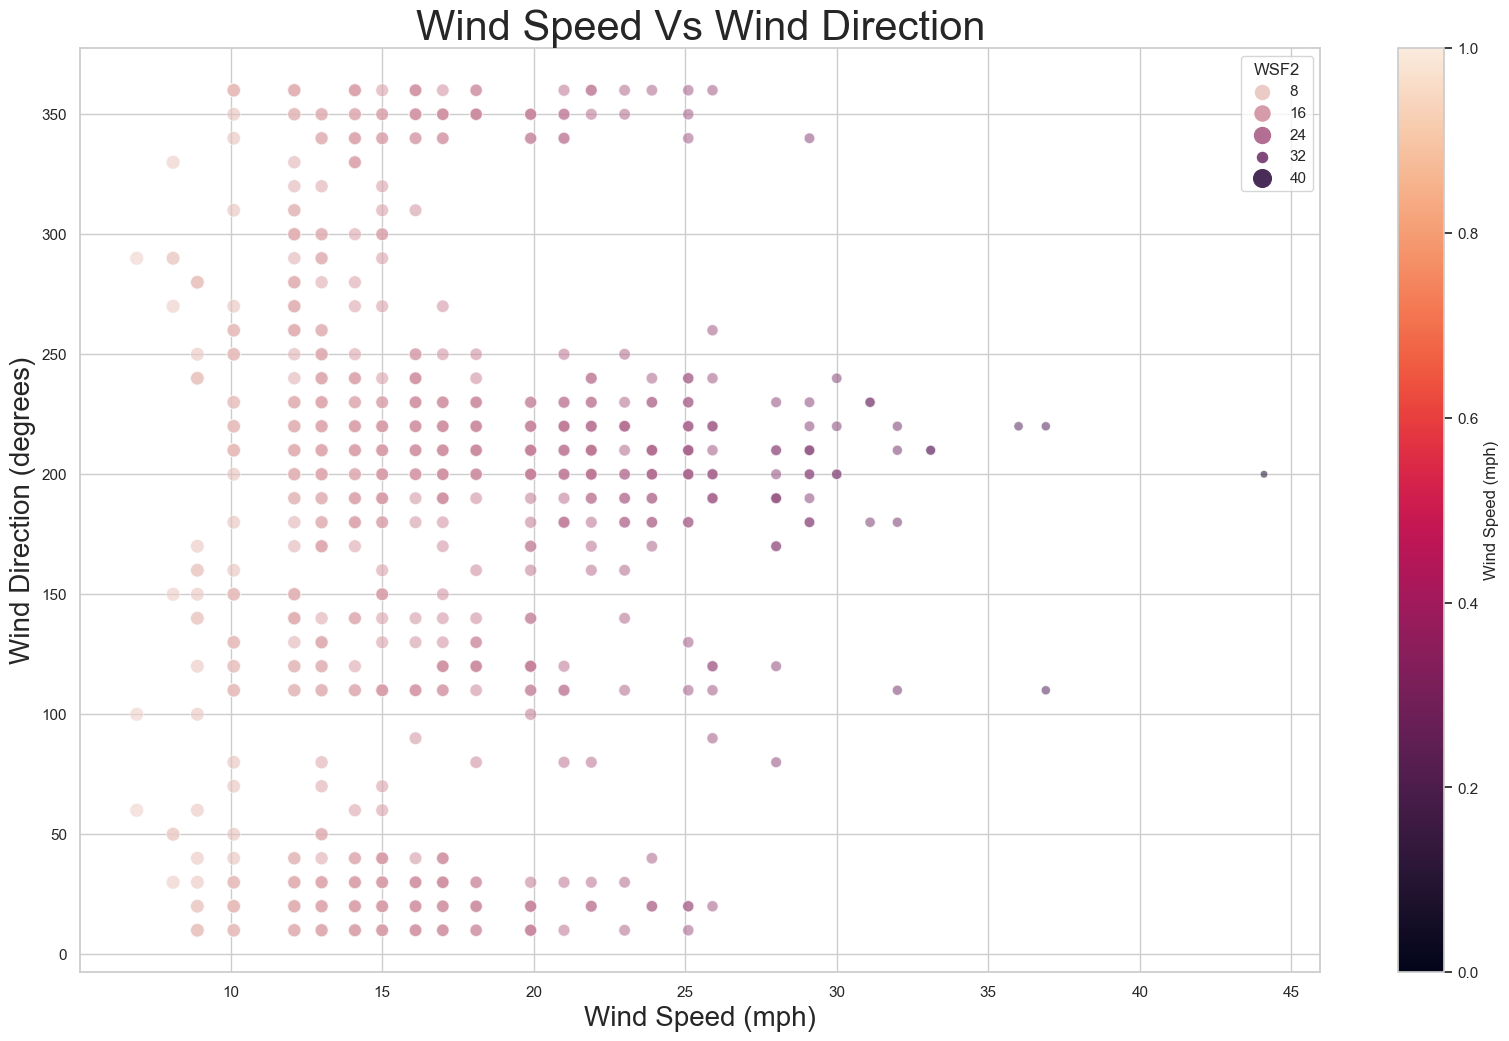

In [20]:
plt.figure(figsize=(20, 12))
sns.set(style = "whitegrid")

# Create the scatterplot
scatter = sns.scatterplot(x = 'WSF2', y = 'WDF2', data = df2, hue = 'WSF2', size = 'WSF2', 
                 sizes = (100,30), alpha = .6)
sns.set_palette("dark")
# Add the colorbar
cbar = scatter.figure.colorbar(scatter.collections[2])
cbar.set_label("Wind Speed (mph)")

# Customize axis labels
plt.xlabel('Wind Speed (mph)', fontsize = 20)
plt.ylabel('Wind Direction (degrees)', fontsize = 20)

# Adding the title
plt.title('Wind Speed Vs Wind Direction', fontsize = 30)

plt.show()

**NOTE:** The scatter plot illustrates the range of wind direction and wind speed values observed in the data, with wind direction values ranging from approximately 10 to over 350 degrees and wind speed values ranging from approximately 3 to 43 mph. The high variability in wind direction and wind speed could potentially have an impact on the performance and integrity of the satellite fleet. The analysis of this data will aid in identifying potential operational issues that may lead to satellite failure and ultimately help in proactively addressing these issues to ensure the continuity of service for customers.

In [21]:
# Inspecting Telemetry Dataset.
df3.head()

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


In [22]:
# 405184 rows and 9 columns
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405184 entries, 0 to 405183
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ts        405184 non-null  float64
 1   device    405184 non-null  object 
 2   co        405184 non-null  float64
 3   humidity  405184 non-null  float64
 4   light     405184 non-null  bool   
 5   lpg       405184 non-null  float64
 6   motion    405184 non-null  bool   
 7   smoke     405184 non-null  float64
 8   temp      405184 non-null  float64
dtypes: bool(2), float64(6), object(1)
memory usage: 22.4+ MB


In [23]:
df3.shape

(405184, 9)

In [24]:
# No missing data so far
df3.isna().sum()

ts          0
device      0
co          0
humidity    0
light       0
lpg         0
motion      0
smoke       0
temp        0
dtype: int64

In [25]:
df3.describe()

,ts,co,humidity,lpg,smoke,temp
count,4.051840e+05,405184.000000,405184.000000,405184.000000,405184.000000,405184.000000
mean,1.594858e+09,0.004639,60.511694,0.007237,0.019264,22.453987
std,1.994984e+05,0.001250,11.366489,0.001444,0.004086,2.698347
min,1.594512e+09,0.001171,1.100000,0.002693,0.006692,0.000000
25%,1.594686e+09,0.003919,51.000000,0.006456,0.017024,19.900000
50%,1.594858e+09,0.004812,54.900000,0.007489,0.019950,22.200000
75%,1.595031e+09,0.005409,74.300003,0.008150,0.021838,23.600000
max,1.595203e+09,0.014420,99.900002,0.016567,0.046590,30.600000


In [26]:
# We have 13 duplicates
df3.duplicated().sum()

13

In [27]:
df3.apply(pd.value_counts).sum()

ts          405184.0
device      405184.0
co          405184.0
humidity    405184.0
light       405184.0
lpg         405184.0
motion      405184.0
smoke       405184.0
temp        405184.0
dtype: float64

/var/folders/ny/y4smplb93zn6dl4f36sqhd9h0000gn/T/ipykernel_87984/2353068533.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df3.corr(), annot = True, cmap = 'coolwarm',ax = ax, vmin = -1, vmax = 1, cbar = False)


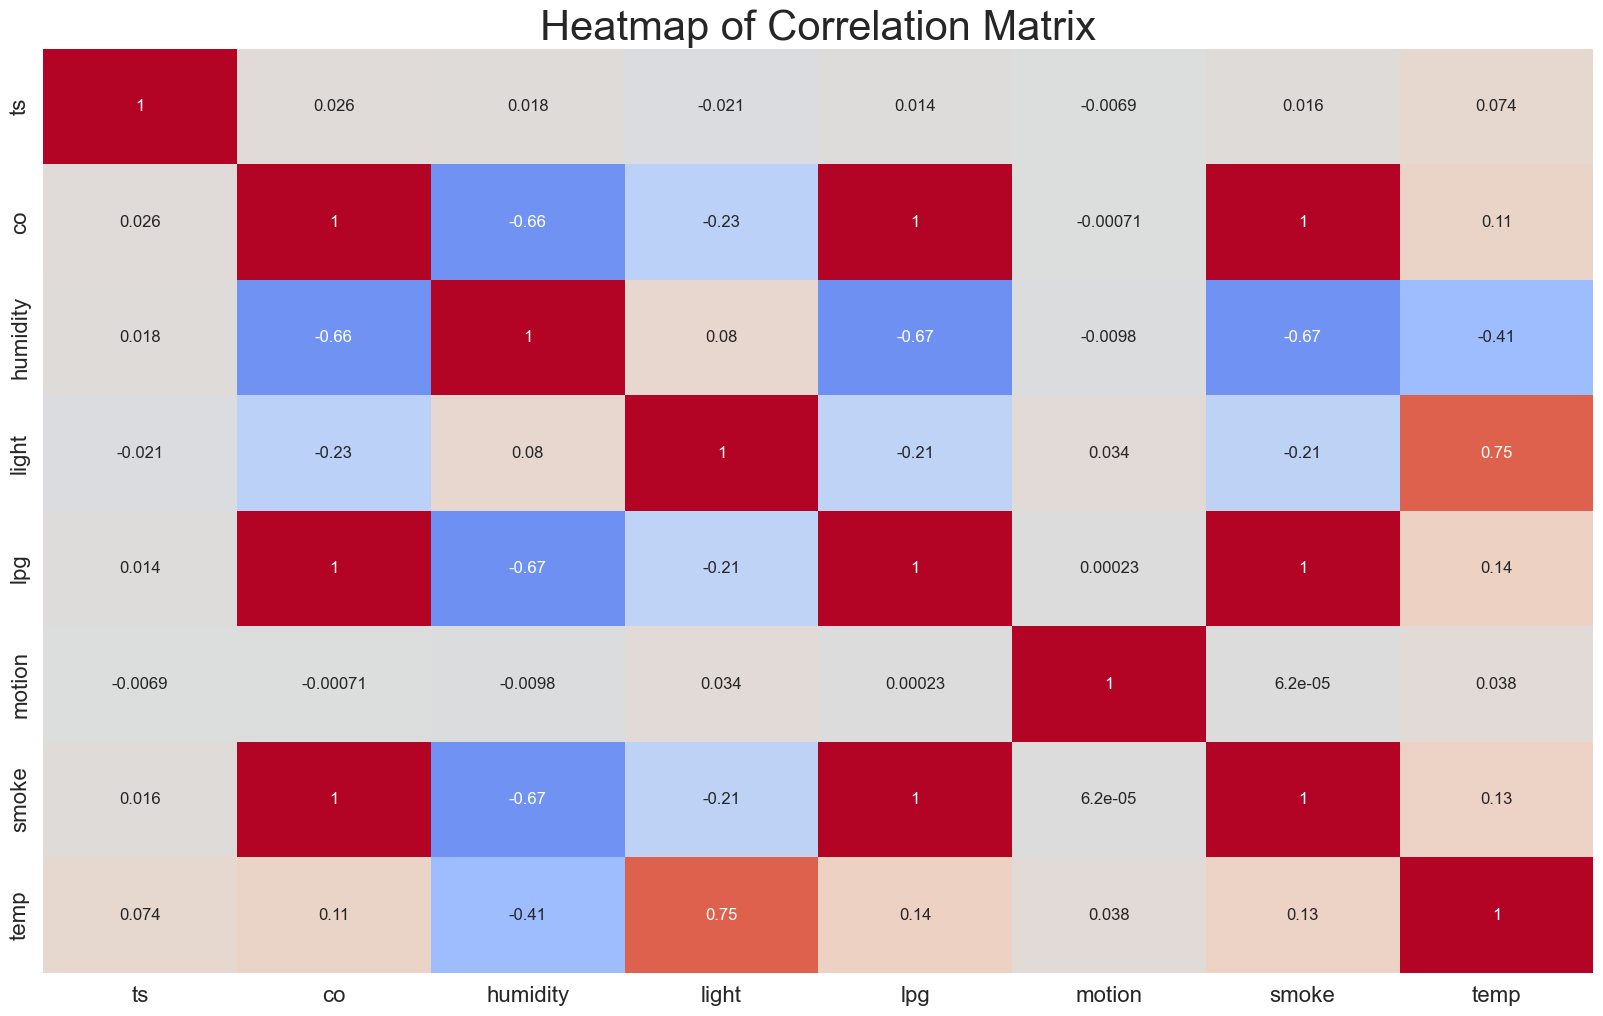

In [28]:
# Create a figure and axis with custom size
fig, ax = plt.subplots(figsize = (20, 12))

# Create a heatmap
sns.heatmap(df3.corr(), annot = True, cmap = 'coolwarm',ax = ax, vmin = -1, vmax = 1, cbar = False)

# Add title
plt.title('Correlation between variables')

# Adjust the labels and title fontsize
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.title("Heatmap of Correlation Matrix", fontsize = 30)

# Show the plot
plt.show()

**NOTE:** The heatmap is showing that 'co' and 'lpg' have the strongest positive correlation (0.997), which means that as the value of one variable increases, the value of the other variable also increases. The heatmap also shows that 'co' and 'smoke' have a strong positive correlation (0.998), 'co' and 'temp' have a moderate positive correlation (0.110), 'humidity' and 'temp' have a moderate negative correlation (-0.410), and 'light' and 'temp' have a strong positive correlation (0.747).

## Data Preprocessing - Cleaning

**Cleaning - SpaceX Dataset**

In [29]:
# Cleaning SpaceX data
SpaceX_cleaned = df1.copy()
SpaceX_cleaned.head()

,Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Users,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,...,Launch Mass (kg.),Date of Launch,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Age
Satellite ID(Fake),,,,,,,,,,,,,,,,,,,,,
1,Starlink-1007,USA,USA,Commercial,LEO,Non-Polar Inclined,0.0,559.0,561.0,0.000144,...,227.0,2019-11-11,NaN,SpaceX,USA,Cape Canaveral,Falcon 9,2019-074A,44713.0,1165
2,Starlink-1008,USA,USA,Commercial,LEO,Non-Polar Inclined,0.0,549.0,551.0,0.000145,...,227.0,2019-11-11,NaN,SpaceX,USA,Cape Canaveral,Falcon 9,2019-074B,44714.0,1165
3,Starlink-1009,USA,USA,Commercial,LEO,Non-Polar Inclined,0.0,549.0,551.0,0.000145,...,227.0,2019-11-11,NaN,SpaceX,USA,Cape Canaveral,Falcon 9,2019-074C,44715.0,1165
4,Starlink-1010,USA,USA,Commercial,LEO,Non-Polar Inclined,0.0,533.0,535.0,0.000145,...,227.0,2019-11-11,NaN,SpaceX,USA,Cape Canaveral,Falcon 9,2019-074D,44716.0,1165
5,Starlink-1011,USA,USA,Commercial,LEO,Non-Polar Inclined,0.0,548.0,551.0,0.000217,...,227.0,2019-11-11,NaN,SpaceX,USA,Cape Canaveral,Falcon 9,2019-074E,44717.0,1165


In [30]:
SpaceX_cleaned['Expected Lifetime (yrs.)'] = SpaceX_cleaned['Expected Lifetime (yrs.)'].fillna('Unknown')

In [31]:
SpaceX_cleaned.head()

,Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Users,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,...,Launch Mass (kg.),Date of Launch,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Age
Satellite ID(Fake),,,,,,,,,,,,,,,,,,,,,
1,Starlink-1007,USA,USA,Commercial,LEO,Non-Polar Inclined,0.0,559.0,561.0,0.000144,...,227.0,2019-11-11,Unknown,SpaceX,USA,Cape Canaveral,Falcon 9,2019-074A,44713.0,1165
2,Starlink-1008,USA,USA,Commercial,LEO,Non-Polar Inclined,0.0,549.0,551.0,0.000145,...,227.0,2019-11-11,Unknown,SpaceX,USA,Cape Canaveral,Falcon 9,2019-074B,44714.0,1165
3,Starlink-1009,USA,USA,Commercial,LEO,Non-Polar Inclined,0.0,549.0,551.0,0.000145,...,227.0,2019-11-11,Unknown,SpaceX,USA,Cape Canaveral,Falcon 9,2019-074C,44715.0,1165
4,Starlink-1010,USA,USA,Commercial,LEO,Non-Polar Inclined,0.0,533.0,535.0,0.000145,...,227.0,2019-11-11,Unknown,SpaceX,USA,Cape Canaveral,Falcon 9,2019-074D,44716.0,1165
5,Starlink-1011,USA,USA,Commercial,LEO,Non-Polar Inclined,0.0,548.0,551.0,0.000217,...,227.0,2019-11-11,Unknown,SpaceX,USA,Cape Canaveral,Falcon 9,2019-074E,44717.0,1165


In [32]:
# Create a new column 'Age of satellite' by calculating the difference between today's 
# date and the 'Date of Launch' column in days
SpaceX_cleaned['Age of satellite'] = (pd.to_datetime('today') - pd.to_datetime(
                                                SpaceX_cleaned['Date of Launch'])).dt.days


In [33]:
SpaceX_clean = SpaceX_cleaned[['Country of Operator/Owner', 'Class of Orbit', 'Type of Orbit',
                     'Eccentricity','Inclination (degrees)','Period (minutes)',
                     'Launch Mass (kg.)','Date of Launch','Age of satellite','Launch Site']]
SpaceX_clean.head()

,Country of Operator/Owner,Class of Orbit,Type of Orbit,Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Date of Launch,Age of satellite,Launch Site
Satellite ID(Fake),,,,,,,,,,
1,USA,LEO,Non-Polar Inclined,0.000144,53.0,95.9,227.0,2019-11-11,1165,Cape Canaveral
2,USA,LEO,Non-Polar Inclined,0.000145,53.0,95.6,227.0,2019-11-11,1165,Cape Canaveral
3,USA,LEO,Non-Polar Inclined,0.000145,53.0,95.5,227.0,2019-11-11,1165,Cape Canaveral
4,USA,LEO,Non-Polar Inclined,0.000145,53.0,95.3,227.0,2019-11-11,1165,Cape Canaveral
5,USA,LEO,Non-Polar Inclined,0.000217,53.0,95.6,227.0,2019-11-11,1165,Cape Canaveral


**Cleaning - Weather Dataset**

In [34]:
# Cleaning weather data by moving all the columns that I may need to a new variable called weather_cleaned
weather_cleaned = df2[['DATE', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'PRCP', 'TMAX', 'TMIN', 
                       'TAVG', 'AWND', 'WDF2', 'WSF2']].copy()
weather_cleaned.head()

,DATE,LATITUDE,LONGITUDE,ELEVATION,PRCP,TMAX,TMIN,TAVG,AWND,WDF2,WSF2
0,2020-11-01,47.44467,-122.31442,112.5,0.00,61,42,49.0,6.71,20.0,16.1
1,2020-11-02,47.44467,-122.31442,112.5,0.00,65,41,51.0,5.59,220.0,13.0
2,2020-11-03,47.44467,-122.31442,112.5,0.90,58,46,51.0,6.71,170.0,13.0
3,2020-11-04,47.44467,-122.31442,112.5,0.18,66,58,60.0,15.43,190.0,28.0
4,2020-11-05,47.44467,-122.31442,112.5,0.32,60,46,57.0,11.41,20.0,23.9


In [35]:
# Replacing the missing values with the mean.

# Create a list of columns with missing data
cols_with_missing_data = ['PRCP', 'TAVG', 'AWND', 'WDF2', 'WSF2']

# Create an imputer object with a strategy of 'mean'
imputer = SimpleImputer(strategy = 'mean')

# Fit the imputer on the weather_data[cols_with_missing_data] dataset
imputer.fit(weather_cleaned[cols_with_missing_data])

# Use the imputer to transform the weather_data[cols_with_missing_data] dataset
weather_cleaned[cols_with_missing_data] = imputer.transform(weather_cleaned[cols_with_missing_data])


In [36]:
weather_cleaned.duplicated().sum()

0

**Cleaning - Telemetry Dataset**

In [37]:
df3.isna().sum().sum()

0

In [38]:
duplicate_rows = df3[df3.duplicated()]
duplicate_rows

,ts,device,co,humidity,light,lpg,motion,smoke,temp
17987,1.594543e+09,1c:bf:ce:15:ec:4d,0.004078,74.199997,True,0.006644,False,0.017556,24.700001
82095,1.594653e+09,1c:bf:ce:15:ec:4d,0.004310,61.700001,True,0.006916,False,0.018325,23.700001
147647,1.594765e+09,b8:27:eb:bf:9d:51,0.005336,48.600000,False,0.008071,False,0.021610,22.600000
155597,1.594778e+09,b8:27:eb:bf:9d:51,0.005370,46.400000,False,0.008108,False,0.021716,22.500000
169440,1.594802e+09,1c:bf:ce:15:ec:4d,0.004009,54.900002,True,0.006563,False,0.017327,24.400000
192426,1.594841e+09,b8:27:eb:bf:9d:51,0.005114,50.800000,False,0.007826,False,0.020912,22.700000
257857,1.594952e+09,1c:bf:ce:15:ec:4d,0.003886,82.500000,True,0.006416,False,0.016913,24.000000
297461,1.595020e+09,b8:27:eb:bf:9d:51,0.006076,50.200000,False,0.008866,False,0.023891,22.600000
305562,1.595033e+09,1c:bf:ce:15:ec:4d,0.004207,60.200001,True,0.006796,False,0.017986,27.900000
328880,1.595073e+09,b8:27:eb:bf:9d:51,0.005688,52.600000,False,0.008453,False,0.022704,22.200000


In [39]:
telemetry_cleaned = df3.copy()
telemetry_cleaned

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000
...,...,...,...,...,...,...,...,...,...
405179,1.595203e+09,00:0f:00:70:91:0a,0.003745,75.300003,False,0.006247,False,0.016437,19.200001
405180,1.595203e+09,b8:27:eb:bf:9d:51,0.005882,48.500000,False,0.008660,False,0.023301,22.200000
405181,1.595203e+09,1c:bf:ce:15:ec:4d,0.004540,75.699997,True,0.007181,False,0.019076,26.600000
405182,1.595203e+09,00:0f:00:70:91:0a,0.003745,75.300003,False,0.006247,False,0.016437,19.200001


In [40]:
telemetry_cleaned = telemetry_cleaned.drop_duplicates()

In [41]:
telemetry_cleaned.duplicated().sum()

0

In [42]:
telemetry_cleaned.value_counts().sum()

405171

**Combining Data - One Dataframe**

In [43]:
cleaned_df = pd.concat([SpaceX_clean, weather_cleaned, telemetry_cleaned], axis = 0)
cleaned_df.head()

,Country of Operator/Owner,Class of Orbit,Type of Orbit,Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Date of Launch,Age of satellite,Launch Site,...,WSF2,ts,device,co,humidity,light,lpg,motion,smoke,temp
1,USA,LEO,Non-Polar Inclined,0.000144,53.0,95.9,227.0,2019-11-11,1165.0,Cape Canaveral,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USA,LEO,Non-Polar Inclined,0.000145,53.0,95.6,227.0,2019-11-11,1165.0,Cape Canaveral,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USA,LEO,Non-Polar Inclined,0.000145,53.0,95.5,227.0,2019-11-11,1165.0,Cape Canaveral,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USA,LEO,Non-Polar Inclined,0.000145,53.0,95.3,227.0,2019-11-11,1165.0,Cape Canaveral,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,USA,LEO,Non-Polar Inclined,0.000217,53.0,95.6,227.0,2019-11-11,1165.0,Cape Canaveral,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
cleaned_df.isna().sum()

Country of Operator/Owner    405976
Class of Orbit               405976
Type of Orbit                405976
Eccentricity                 405976
Inclination (degrees)        405976
Period (minutes)             405976
Launch Mass (kg.)            405976
Date of Launch               405976
Age of satellite             405976
Launch Site                  405976
DATE                         406073
LATITUDE                     406073
LONGITUDE                    406073
ELEVATION                    406073
PRCP                         406073
TMAX                         406073
TMIN                         406073
TAVG                         406073
AWND                         406073
WDF2                         406073
WSF2                         406073
ts                             1707
device                         1707
co                             1707
humidity                       1707
light                          1707
lpg                            1707
motion                      

In [45]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406878 entries, 1 to 405183
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Country of Operator/Owner  902 non-null     object        
 1   Class of Orbit             902 non-null     object        
 2   Type of Orbit              902 non-null     object        
 3   Eccentricity               902 non-null     float64       
 4   Inclination (degrees)      902 non-null     float64       
 5   Period (minutes)           902 non-null     float64       
 6   Launch Mass (kg.)          902 non-null     float64       
 7   Date of Launch             902 non-null     datetime64[ns]
 8   Age of satellite           902 non-null     float64       
 9   Launch Site                902 non-null     object        
 10  DATE                       805 non-null     object        
 11  LATITUDE                   805 non-null     float64 

In [46]:
# Dealing with missing values.
for col in cleaned_df.columns:
    if cleaned_df[col].isnull().sum() > 0:
        if cleaned_df[col].dtype in ['int64', 'float64']:
            mean_value = cleaned_df[col].mean()
            cleaned_df[col] = cleaned_df[col].fillna(mean_value)
        else:
            mode_value = cleaned_df[col].mode()[0]
            cleaned_df[col] = cleaned_df[col].fillna(mode_value)

In [47]:
cleaned_df.isna().sum().sum()

0

In [48]:
cleaned_df.head()

,Country of Operator/Owner,Class of Orbit,Type of Orbit,Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Date of Launch,Age of satellite,Launch Site,...,WSF2,ts,device,co,humidity,light,lpg,motion,smoke,temp
1,USA,LEO,Non-Polar Inclined,0.000144,53.0,95.9,227.0,2019-11-11,1165.0,Cape Canaveral,...,16.835697,1.594858e+09,b8:27:eb:bf:9d:51,0.004639,60.511817,False,0.007237,False,0.019264,22.453958
2,USA,LEO,Non-Polar Inclined,0.000145,53.0,95.6,227.0,2019-11-11,1165.0,Cape Canaveral,...,16.835697,1.594858e+09,b8:27:eb:bf:9d:51,0.004639,60.511817,False,0.007237,False,0.019264,22.453958
3,USA,LEO,Non-Polar Inclined,0.000145,53.0,95.5,227.0,2019-11-11,1165.0,Cape Canaveral,...,16.835697,1.594858e+09,b8:27:eb:bf:9d:51,0.004639,60.511817,False,0.007237,False,0.019264,22.453958
4,USA,LEO,Non-Polar Inclined,0.000145,53.0,95.3,227.0,2019-11-11,1165.0,Cape Canaveral,...,16.835697,1.594858e+09,b8:27:eb:bf:9d:51,0.004639,60.511817,False,0.007237,False,0.019264,22.453958
5,USA,LEO,Non-Polar Inclined,0.000217,53.0,95.6,227.0,2019-11-11,1165.0,Cape Canaveral,...,16.835697,1.594858e+09,b8:27:eb:bf:9d:51,0.004639,60.511817,False,0.007237,False,0.019264,22.453958
